# Comparison of Classification Report Metrics & Time Complexity for Multiclass Classification Models
### By: Andrew Assile and Aditya Bhandari
http://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set#

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import exp
import glob
%matplotlib inline

In [2]:
data = pd.read_csv(r'G:\CMPS_320\WinnipegDataset.csv')
data.shape

(325834, 175)

In [3]:
data

,Crop_Type,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.55900,-21.4070,-11.40400,-15.24800,-11.92300,-15.29100,-2.15480,-7.8474,-10.0020,...,0.18519,0.726020,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.80200,-20.3350,-10.39900,-14.13200,-11.09600,-14.36100,-2.40390,-7.5330,-9.9369,...,0.33333,-0.487510,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.43100,-19.9020,-10.07400,-13.59800,-10.82900,-14.04800,-2.35660,-7.4717,-9.8283,...,0.25926,0.252980,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.68900,-19.5290,-10.02800,-13.35000,-11.05600,-14.01400,-2.66110,-6.8396,-9.5006,...,0.16049,0.437500,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.68600,-19.2780,-9.81850,-13.10800,-10.93200,-13.93900,-2.86750,-6.5919,-9.4594,...,0.18519,0.350000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,7,2.48230,-7.6870,1.07950,0.74318,-0.94070,0.90493,1.40280,-10.1690,-8.7665,...,0.13580,0.760800,2.3333,0.222220,0.88889,0.22222,0.22222,1.06090,0.35802,0.63246
325830,7,2.52340,-7.6745,1.08680,0.76189,-0.91177,0.93663,1.43660,-10.1980,-8.7614,...,0.13580,-0.383990,6.0000,10.444000,0.12684,19.55600,4.00000,2.19720,0.11111,0.81224
325831,7,-1.92700,-11.4160,-2.43540,-3.45370,-4.15130,-3.48100,0.50845,-9.4886,-8.9802,...,0.13580,0.754830,2.3333,0.222220,0.83333,0.33333,0.33333,1.27300,0.30864,0.31623
325832,7,0.12483,-10.1440,-0.62193,-1.54210,-2.31000,-1.52500,0.74676,-10.2690,-9.5218,...,0.33333,0.059761,3.0000,0.000000,0.94444,0.11111,0.11111,0.34883,0.80247,0.18898


In [4]:
#counting num values of each crop type
data.Crop_Type.value_counts().to_dict()

{6: 85074, 3: 75673, 4: 74067, 5: 47117, 1: 39162, 2: 3598, 7: 1143}

In [5]:
df_frequency_map = data.Crop_Type.value_counts().to_dict()
data.Crop_Type = data.Crop_Type.map(df_frequency_map)
data.head()

,Crop_Type,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,39162,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,39162,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,39162,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,39162,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,39162,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [6]:
#Feature Scalling the data
scaling = MinMaxScaler()
df = pd.read_csv(r'G:\CMPS_320\WinnipegDataset.csv')
df.drop('Crop_Type', axis=1,inplace=True)

In [7]:
data_1 = scaling.fit_transform(df[['f1','f2','f3','f4','f5','f6','f7','f8','f9',
                          'f10','f11','f12','f13','f14','f15','f16','f17','f18','f19',
                          'f20','f21','f22','f23','f24','f25','f26','f27','f28','f29',
                          'f30','f31','f32','f33','f34','f35','f36','f37','f38','f39',
                          'f40','f41','f42','f43','f44','f45','f46','f47','f48','f49',
                          'f50','f51','f52','f53','f54','f55','f56','f57','f58','f59',
                          'f60','f61','f62','f63','f64','f65','f66','f67','f68','f69',
                          'f70','f71','f72','f73','f74','f75','f76','f77','f78','f79',
                          'f80','f81','f82','f83','f84','f85','f86','f87','f88','f89',
                          'f90','f91','f92','f93','f94','f95','f96','f97','f98','f99',
                          'f100','f101','f102','f103','f104','f105','f106','f107','f108','f109',
                          'f110','f111','f112','f113','f114','f115','f116','f117','f118','f119',
                          'f120','f121','f122','f123','f124','f125','f126','f127','f128','f129',
                          'f130','f131','f132','f133','f134','f135','f136','f137','f138','f139',
                          'f140','f141','f142','f143','f144','f145','f146','f147','f148','f149',
                          'f150','f151','f152','f153','f154','f155','f156','f157','f158','f159',
                          'f160','f161','f162','f163','f164','f165','f166','f167','f168','f169',
                          'f170','f171','f172','f173','f174']])
df_1 = pd.DataFrame(data_1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.392808,0.482842,0.484525,0.428160,0.479835,0.416751,0.271778,0.561445,0.419359,0.424448,...,0.083340,0.863010,0.428584,0.231205,0.211119,0.146666,0.366658,0.763244,0.111116,0.827110
1,0.421367,0.522963,0.525943,0.467989,0.518816,0.450145,0.252028,0.582111,0.423523,0.453058,...,0.249997,0.256245,0.169648,0.003806,0.813529,0.005000,0.049999,0.386260,0.444442,0.405510
2,0.435363,0.539169,0.539336,0.487047,0.531401,0.461385,0.255778,0.586140,0.430470,0.487101,...,0.166669,0.626490,0.178576,0.006660,0.651928,0.013333,0.100000,0.579374,0.222221,0.552415
3,0.425630,0.553129,0.541232,0.495897,0.520702,0.462606,0.231635,0.627688,0.451431,0.520013,...,0.055552,0.718750,0.330368,0.012369,0.813529,0.005000,0.049999,0.522984,0.305561,0.708015
4,0.425743,0.562523,0.549866,0.504534,0.526546,0.465299,0.215271,0.643970,0.454067,0.545796,...,0.083340,0.675000,0.321440,0.017126,0.651928,0.013333,0.100000,0.719598,0.111116,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,0.997989,0.996336,0.998990,0.998868,0.997487,0.998318,0.553847,0.408845,0.498388,0.393053,...,0.027776,0.880400,0.187504,0.008563,0.875689,0.003333,0.033333,0.482842,0.277773,0.816230
325830,0.999540,0.996804,0.999291,0.999535,0.998851,0.999456,0.556527,0.406939,0.498715,0.391057,...,0.027776,0.308005,0.482160,0.402451,0.023103,0.293339,0.599997,1.000000,0.000000,0.906120
325831,0.831642,0.856772,0.854136,0.849086,0.846155,0.840827,0.482938,0.453568,0.484719,0.422123,...,0.027776,0.877415,0.187504,0.008563,0.813529,0.005000,0.049999,0.579374,0.222221,0.658115
325832,0.909050,0.904379,0.928872,0.917308,0.932945,0.911063,0.501832,0.402272,0.450075,0.415294,...,0.249997,0.529880,0.241080,0.000000,0.937839,0.001667,0.016666,0.158761,0.777779,0.594490


In [8]:
df1 = pd.read_csv(r'G:\CMPS_320\WinnipegDataset.csv', usecols=['Crop_Type'])

dataFrame = df_1.insert(0, 'Crop_Type', df1['Crop_Type'], allow_duplicates=False)
df1

,Crop_Type
0,1
1,1
2,1
3,1
4,1
...,...
325829,7
325830,7
325831,7
325832,7


In [9]:
#data after feature scaling
df_1

,Crop_Type,0,1,2,3,4,5,6,7,8,...,164,165,166,167,168,169,170,171,172,173
0,1,0.392808,0.482842,0.484525,0.428160,0.479835,0.416751,0.271778,0.561445,0.419359,...,0.083340,0.863010,0.428584,0.231205,0.211119,0.146666,0.366658,0.763244,0.111116,0.827110
1,1,0.421367,0.522963,0.525943,0.467989,0.518816,0.450145,0.252028,0.582111,0.423523,...,0.249997,0.256245,0.169648,0.003806,0.813529,0.005000,0.049999,0.386260,0.444442,0.405510
2,1,0.435363,0.539169,0.539336,0.487047,0.531401,0.461385,0.255778,0.586140,0.430470,...,0.166669,0.626490,0.178576,0.006660,0.651928,0.013333,0.100000,0.579374,0.222221,0.552415
3,1,0.425630,0.553129,0.541232,0.495897,0.520702,0.462606,0.231635,0.627688,0.451431,...,0.055552,0.718750,0.330368,0.012369,0.813529,0.005000,0.049999,0.522984,0.305561,0.708015
4,1,0.425743,0.562523,0.549866,0.504534,0.526546,0.465299,0.215271,0.643970,0.454067,...,0.083340,0.675000,0.321440,0.017126,0.651928,0.013333,0.100000,0.719598,0.111116,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,7,0.997989,0.996336,0.998990,0.998868,0.997487,0.998318,0.553847,0.408845,0.498388,...,0.027776,0.880400,0.187504,0.008563,0.875689,0.003333,0.033333,0.482842,0.277773,0.816230
325830,7,0.999540,0.996804,0.999291,0.999535,0.998851,0.999456,0.556527,0.406939,0.498715,...,0.027776,0.308005,0.482160,0.402451,0.023103,0.293339,0.599997,1.000000,0.000000,0.906120
325831,7,0.831642,0.856772,0.854136,0.849086,0.846155,0.840827,0.482938,0.453568,0.484719,...,0.027776,0.877415,0.187504,0.008563,0.813529,0.005000,0.049999,0.579374,0.222221,0.658115
325832,7,0.909050,0.904379,0.928872,0.917308,0.932945,0.911063,0.501832,0.402272,0.450075,...,0.249997,0.529880,0.241080,0.000000,0.937839,0.001667,0.016666,0.158761,0.777779,0.594490


In [10]:
df_1.describe()

,Crop_Type,0,1,2,3,4,5,6,7,8,...,164,165,166,167,168,169,170,171,172,173
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,0.333026,0.384820,0.319842,0.308751,0.358676,0.304131,0.462956,0.493412,0.507375,...,0.363064,0.664543,0.174476,0.003088,0.910052,0.002617,0.024435,0.183547,0.735227,0.833784
std,1.604617,0.132203,0.151736,0.134674,0.132464,0.150314,0.131989,0.133365,0.079142,0.128101,...,0.276589,0.221004,0.103235,0.007037,0.118541,0.005606,0.033301,0.218524,0.308078,0.235630
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.230999,0.269060,0.230703,0.206853,0.241049,0.195592,0.360341,0.442400,0.415009,...,0.166669,0.500000,0.080360,0.000000,0.813529,0.000000,0.000000,0.000000,0.444442,0.678570
50%,4.000000,0.301019,0.345972,0.288358,0.273270,0.330134,0.273441,0.467138,0.491212,0.500525,...,0.277773,0.678570,0.160720,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,6.000000,0.459697,0.521017,0.401154,0.413813,0.488697,0.408743,0.566168,0.538913,0.601271,...,0.444442,0.830720,0.241080,0.006660,1.000000,0.005000,0.049999,0.386260,1.000000,1.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Arranging X and y data

X = df_1.iloc[:,1:].values
y = df_1.iloc[:, 0].values

In [12]:
y.shape

(325834,)

In [13]:
X.shape

(325834, 174)

In [14]:
#Spliting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=33)

In [15]:
X_train.shape

(228083, 174)

In [16]:
y_train.shape

(228083,)

In [17]:
X_test.shape

(97751, 174)

In [18]:
y_test.shape

(97751,)

In [19]:
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE

<AxesSubplot:ylabel='Frequency'>

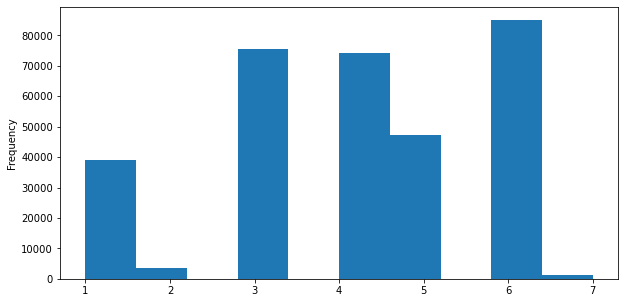

In [20]:
#histogram plot of number of each crop type
plt.figure(figsize = (10,5))
df_1['Crop_Type'].plot(kind ="hist")

Decision Tree Classification

In [21]:
%matplotlib inline
import sklearn as tree
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier()

In [23]:
import timeit
tic=timeit.default_timer()

In [24]:
#fitting both the training set data in the classifier
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
toc=timeit.default_timer() - tic
print("Train time in seconds for Decision Tree classifier: ", toc)

Train time in seconds for Decision Tree classifier:  106.12810907299999


In [26]:
#preciting values
y_pred= tree_clf.predict(X_test)

In [27]:
y_pred

array([6, 1, 3, ..., 3, 5, 4], dtype=int64)

In [28]:
score = tree_clf.score(X_test, y_test)
score

0.9883172550664443

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11530,     2,    15,    52,    23,    23,    10],
       [    0,  1066,    10,     2,     1,     1,     0],
       [   11,     1, 22625,    34,    16,     8,     1],
       [   33,     0,    31, 22074,    67,    50,     0],
       [   22,     0,    18,    67, 13794,   259,     6],
       [   19,     0,     8,    55,   264, 25185,     6],
       [   11,     1,     2,     0,     8,     5,   335]], dtype=int64)

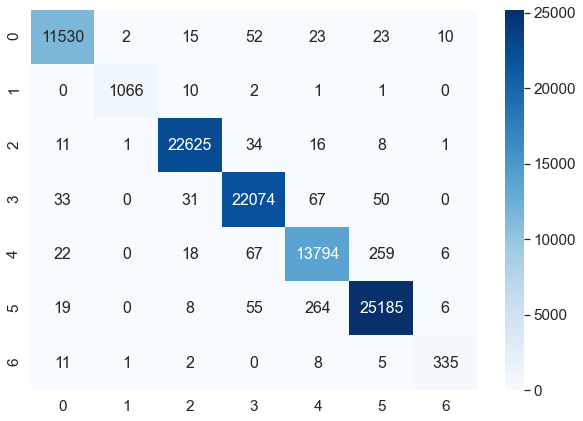

In [30]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           1   0.991743  0.989275  0.990507     11655
           2   0.996262  0.987037  0.991628      1080
           3   0.996301  0.996872  0.996586     22696
           4   0.990576  0.991867  0.991221     22255
           5   0.973259  0.973740  0.973499     14166
           6   0.986448  0.986216  0.986332     25537
           7   0.935754  0.925414  0.930556       362

    accuracy                       0.988317     97751
   macro avg   0.981478  0.978632  0.980047     97751
weighted avg   0.988316  0.988317  0.988316     97751



In [32]:
tree_clf.predict_proba(X_train)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [33]:
from IPython.display import Image
import pydotplus
import sklearn
import graphviz

In [34]:
dota_data =tree.tree.export_graphviz(tree_clf)

In [35]:
dot_data = tree.tree.export_graphviz(tree_clf, out_file=None)

In [36]:
graph = graphviz.Source(dot_data)

In [37]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [38]:
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.342236 to fit



In [39]:
#now running linear regression

In [40]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
import timeit
tic=timeit.default_timer()
regression.fit(X_train,y_train)

LinearRegression()

In [41]:
toc=timeit.default_timer() - tic
print("Train time in seconds for Linear Regression classifier: ", toc)

Train time in seconds for Linear Regression classifier:  2.404019759999983


In [42]:
y_pred=regression.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)
score2=regression.score(X_test, y_test)

In [44]:
print(score1)

0.9300047098227282


In [45]:
#running logistic regression

In [46]:
# Fitting Logistic Regression Classifier 

from sklearn.linear_model import LogisticRegression
lr_cf = LogisticRegression(penalty='l1', solver='saga',random_state = 101,multi_class='multinomial')
import timeit
tic=timeit.default_timer()
lr_cf.fit(X_train, y_train)

G:\Anaconda\envs\cmps320\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', penalty='l1', random_state=101,
                   solver='saga')

In [47]:
toc=timeit.default_timer() - tic
print("Train time in seconds for Logestic Regression classifier: ", toc)

Train time in seconds for Logestic Regression classifier:  495.835171343


In [48]:
#Predicting
y_pred = lr_cf.predict(X_test)

In [49]:
scoree = lr_cf.score(X_test, y_test)
scoree

0.9877136806784585

In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)

In [52]:
cm

array([[11543,     2,    19,    51,    14,    16,    10],
       [    1,  1074,     0,     3,     1,     1,     0],
       [    8,     3, 22637,    15,    17,    11,     5],
       [   38,     1,    25, 22099,    58,    34,     0],
       [   23,     0,    24,    55, 13632,   420,    12],
       [    4,     1,    16,    33,   257, 25214,    12],
       [    7,     0,     1,     0,     2,     1,   351]], dtype=int64)

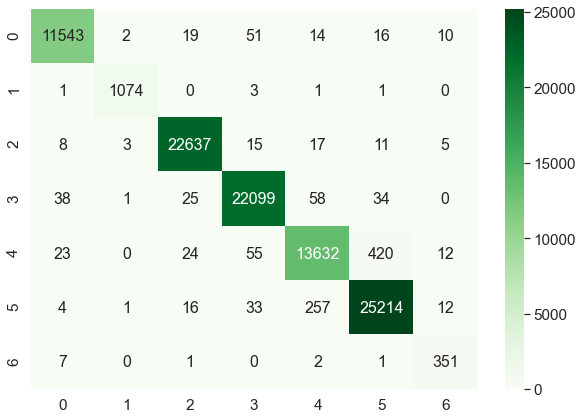

In [53]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap='Greens', fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [54]:
# Evaluate predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           1   0.993032  0.990390  0.991709     11655
           2   0.993525  0.994444  0.993984      1080
           3   0.996259  0.997400  0.996829     22696
           4   0.992946  0.992990  0.992968     22255
           5   0.975038  0.962304  0.968629     14166
           6   0.981204  0.987352  0.984268     25537
           7   0.900000  0.969613  0.933511       362

    accuracy                       0.987714     97751
   macro avg   0.976000  0.984928  0.980271     97751
weighted avg   0.987725  0.987714  0.987706     97751



In [55]:
#RandomForestClassification

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
import timeit
tic=timeit.default_timer()

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [57]:
toc=timeit.default_timer() - tic
print("Train time in seconds for Random Forest classifier: ", toc)

Train time in seconds for Random Forest classifier:  35.284478946000036


In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred

array([6, 1, 3, ..., 3, 5, 4], dtype=int64)

In [60]:
#accuracy score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11596,     0,    14,    33,     4,     1,     7],
       [    0,  1076,     1,     3,     0,     0,     0],
       [    2,     1, 22668,    10,    11,     4,     0],
       [   17,     0,    17, 22174,    27,    20,     0],
       [    8,     0,    17,    45, 14015,    75,     6],
       [    7,     0,     8,    32,    90, 25397,     3],
       [    3,     0,     0,     0,     1,     3,   355]], dtype=int64)

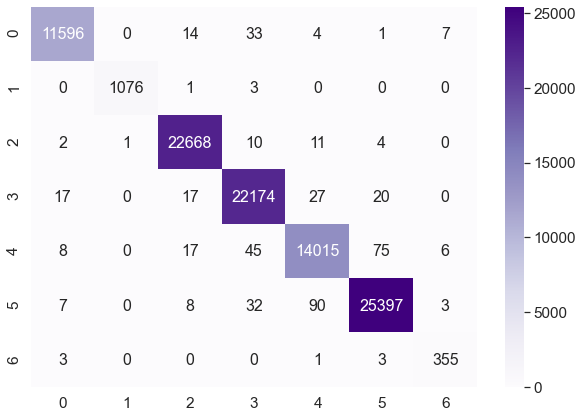

In [61]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap='Purples', fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 6))

              precision    recall  f1-score   support

           1   0.996819  0.994938  0.995878     11655
           2   0.999071  0.996296  0.997682      1080
           3   0.997492  0.998766  0.998129     22696
           4   0.994484  0.996360  0.995421     22255
           5   0.990599  0.989341  0.989970     14166
           6   0.995961  0.994518  0.995239     25537
           7   0.956873  0.980663  0.968622       362

    accuracy                       0.995192     97751
   macro avg   0.990186  0.992983  0.991563     97751
weighted avg   0.995195  0.995192  0.995192     97751



In [63]:
#support vector machine

In [64]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', gamma='auto', C=2)
import timeit
tic=timeit.default_timer()
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [65]:
toc=timeit.default_timer() - tic
print("Train time in seconds for SVM Regression classifier: ", toc)

Train time in seconds for SVM Regression classifier:  343.521444168


In [66]:
Ypredict=classifier.predict(X_test)

In [67]:
Ypredict

array([6, 1, 3, ..., 3, 5, 4], dtype=int64)

In [68]:
cm = confusion_matrix(y_test, Ypredict)
cm

array([[11585,     1,    18,    34,     4,     3,    10],
       [    0,  1079,     0,     1,     0,     0,     0],
       [    3,     0, 22665,    11,     5,    11,     1],
       [   37,     0,    23, 22139,    41,    15,     0],
       [   16,     0,    20,    65, 13715,   347,     3],
       [    6,     0,    13,    31,   243, 25238,     6],
       [    2,     0,     0,     0,     2,     1,   357]], dtype=int64)

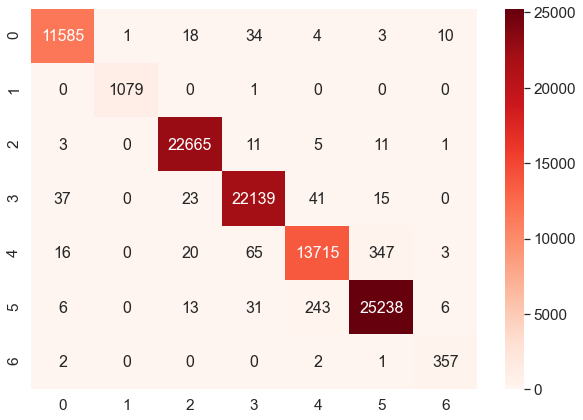

In [69]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Ypredict, digits=6))

              precision    recall  f1-score   support

           1   0.994506  0.993994  0.994250     11655
           2   0.999074  0.999074  0.999074      1080
           3   0.996746  0.998634  0.997689     22696
           4   0.993627  0.994788  0.994207     22255
           5   0.978944  0.968163  0.973524     14166
           6   0.985282  0.988291  0.986784     25537
           7   0.946950  0.986188  0.966171       362

    accuracy                       0.990046     97751
   macro avg   0.985018  0.989876  0.987385     97751
weighted avg   0.990035  0.990046  0.990034     97751



In [71]:
#Stocastic Gradient Descent

In [72]:
from sklearn.linear_model import SGDClassifier

In [73]:
sgd_clf = SGDClassifier(random_state=42)

In [74]:
SGDClassifier

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [75]:
import timeit
tic=timeit.default_timer()
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [76]:
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)

Train time in seconds for that classifier:  5.957751844999848


In [77]:
Ypredict=sgd_clf.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, Ypredict)
cm

array([[11497,    14,    31,    88,    10,     5,    10],
       [    2,  1071,     0,     7,     0,     0,     0],
       [    0,     8, 22658,    11,    10,     9,     0],
       [   76,     1,    63, 22002,    64,    47,     2],
       [   84,     3,    41,   121, 13275,   625,    17],
       [   38,     2,    47,    63,   309, 25064,    14],
       [    5,     0,     8,     0,     0,     1,   348]], dtype=int64)

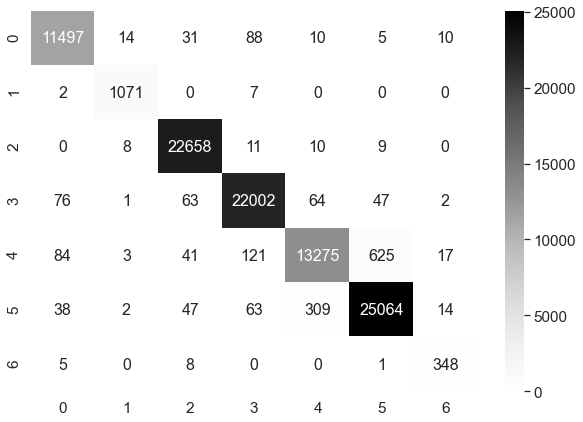

In [79]:
df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap='Greys', fmt='g', annot_kws={"size": 16}) # font size

plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Ypredict, digits=6))

              precision    recall  f1-score   support

           1   0.982482  0.986444  0.984459     11655
           2   0.974522  0.991667  0.983020      1080
           3   0.991684  0.998326  0.994994     22696
           4   0.986991  0.988632  0.987811     22255
           5   0.971247  0.937103  0.953869     14166
           6   0.973321  0.981478  0.977383     25537
           7   0.890026  0.961326  0.924303       362

    accuracy                       0.981218     97751
   macro avg   0.967182  0.977853  0.972263     97751
weighted avg   0.981193  0.981218  0.981148     97751



In [81]:
#HeatMap

In [82]:
X = df_1.drop("Crop_Type", axis=1)
y = df_1["Crop_Type"]

In [83]:
#splitting the data to test and train with test size being 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((228083, 174), (97751, 174))

In [84]:
import seaborn as sns
plt.figure(figsize = (12, 10))
cor = X_train.corr()

<Figure size 864x720 with 0 Axes>

In [85]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [86]:
corr_features = correlation(X_train, 0.25)
len(set(corr_features)) # num features to be removed

169

In [87]:
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

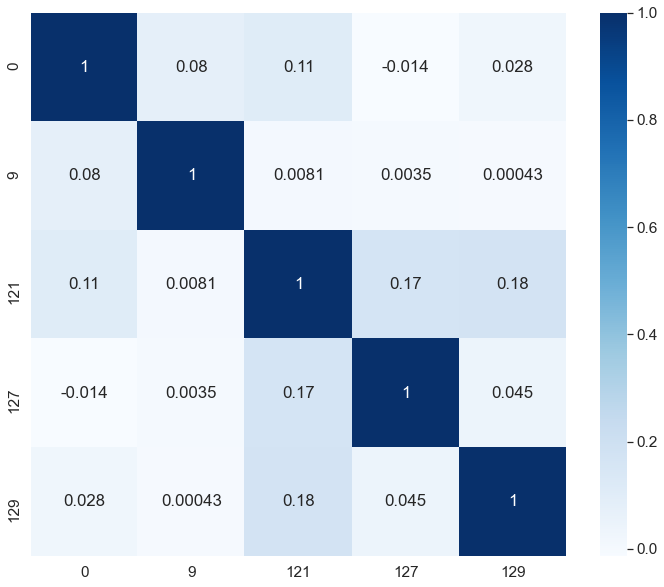

In [88]:
plt.figure(figsize = (12, 10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

In [89]:
corr_features_1 = correlation(df_1, 0.25)
len(set(corr_features_1))

169

In [90]:
df_1 = df_1.drop(corr_features_1, axis = 1)
df_1.rename(columns={0:"f1"}, inplace = True)
df_1.rename(columns={9:"f8"}, inplace = True)
df_1.rename(columns={41:"f40"}, inplace = True)
df_1.rename(columns={121:"f120"}, inplace = True)
df_1.rename(columns={129:"f128"}, inplace = True)
df_1

,Crop_Type,f8,f40,f120,127,f128
0,1,0.424448,0.040665,0.066544,0.726350,0.137469
1,1,0.453058,0.099799,0.003797,0.433775,0.002553
2,1,0.487101,0.160690,0.005396,0.658705,0.002553
3,1,0.520013,0.218368,0.012590,0.540291,0.011980
4,1,0.545796,0.249245,0.003597,0.905555,0.007266
...,...,...,...,...,...,...
325829,7,0.393053,0.212874,0.197434,0.689870,0.001375
325830,7,0.391057,0.255751,0.203432,0.507648,0.051452
325831,7,0.422123,0.082694,0.031373,0.895530,0.003142
325832,7,0.415294,0.137658,0.036769,0.519703,0.004910


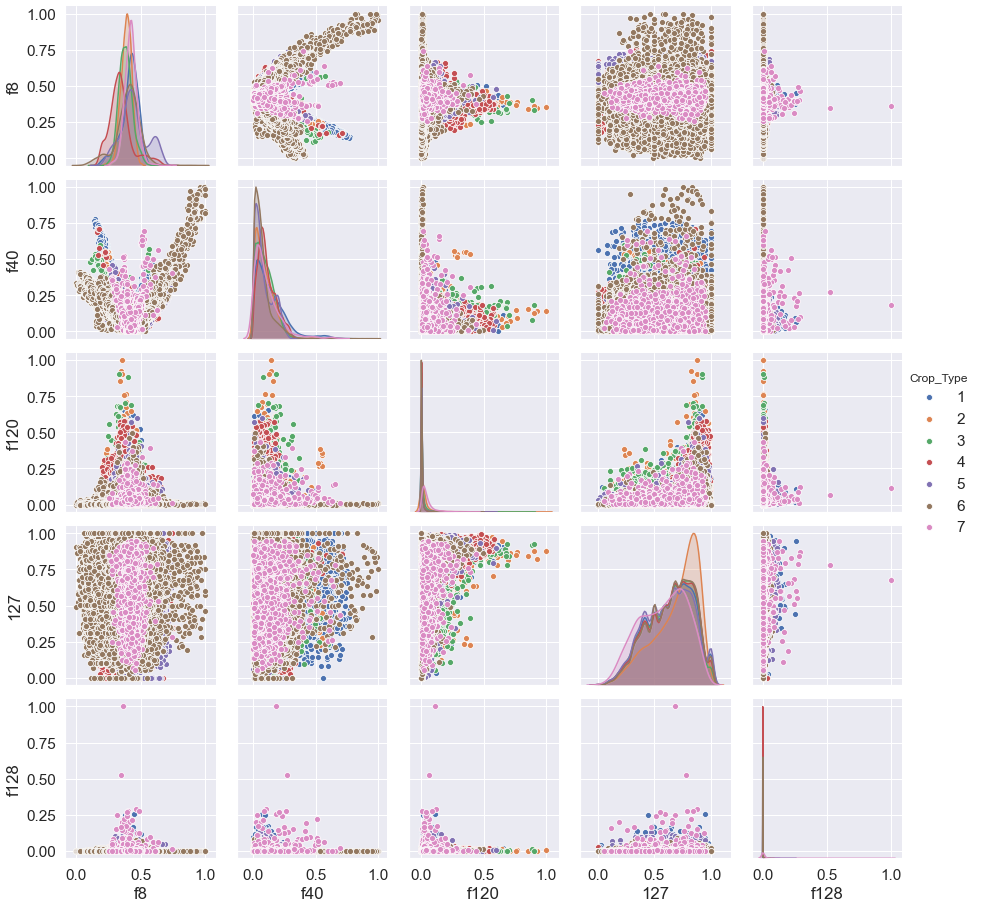

In [91]:
sns.pairplot(df_1, hue="Crop_Type")